**Classification Project**

---



By


**Indranil Pradhan (2019202008)**


**Souptik Mondal (2019201090)**

**Overview**



The project deals with Earthequake Data Analysis. The data has been collected from "Earthquake Engineering Research Centre" from "Internation Institute of Information Technology, Hyderabad". 


By analysis we need to find out the Threshold value between [4,5] for which the data is well seperated into earthequake [1] and no earthquake [0].


The analysis comprises of two famous classifiers K nearest Neighbours and Decision Tree. For analysis we need to consider number of nearest neighbours for K nearest neighbours and pre-prune depth for Decision Tree. With these two classifiers it is needed to find hidden pattern among the data and report the best classifier with best parameter.



---



---



**Dataset**



The provided dataset has 20 columns and 52989 records.


The period of the data is from 2474 BC  -  2015 AD.


The columns are respoectively 


*   **Sl. No**.: Serial Number.
*   **Year, Month, Day**: Date of a particular earthquake as per UTC (Coordinated Universal Time).
*   Origin Time of earthquake in **UTC** and **IST** (Indian Standard Time) in
[Hour: Minute: seconds] format.
*   **Magnitude of Earthquake**: There are a different way to represent the
magnitude of an earthquake. For your study, you can consider Mw, since
we are deriving other types from Mw only.
*   GPS Location in terms of **Latitude**(Lat) and **Longitude**(Long) of earth-
quake.
*   **Depth**: Depth of occurrence of an earthquake in kilometre.
*   **Location**: Name of a region where an earthquake took place.
*   **Source**: The agency from which we have gathered the data, for e.g. IMD=
Indian Meteorological Department, Min. of Earth Science, Government
of India.



The target here is Mw which magnitude of the earthquake. Currently Mw is given as numerical value. So it is needed to apply threshold to the magnitude of the earhquake and transform these into catergorical value value 1 and 0 where 1 means earhquake and 0 means no earthquake i.e. if a threshold of T . For Mw < T, label becomes 0 (no earthquake) and for Mw ≥ T becomes 1 (earthquake).



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Searial No  52989 non-null  int64  
 1   Year        52989 non-null  int64  
 2   Month       52971 non-null  object 
 3   Day         52932 non-null  float64
 4   (UTC)       21186 non-null  object 
 5   (IST)       426 non-null    object 
 6   Mw          40935 non-null  float64
 7   Mw          50485 non-null  object 
 8   Mb          12283 non-null  object 
 9   Mb.1        50497 non-null  object 
 10  Ms          52823 non-null  object 
 11  ML          52823 non-null  object 
 12  Latitude    52989 non-null  object 
 13  Longitude   52989 non-null  object 
 14  Depth       50811 non-null  float64
 15  MM          41 non-null     object 
 16  MMI         0 non-null      float64
 17  MME         0 non-null      float64
 18  Location    9374 non-null   object 
 19  Reference   51407 non-nul



---

---





**Data Cleaning**



After going through the dataset it is been noticed that first few rows are informal rows which are not needed for our analysis. 


The number of missing values are calculated for each column. and the result is printed below.-

Searial No        0
Year              0
Month            18
Day              57
(UTC)         31803
(IST)         52563
Mw            12054
Mw             2504
Mb            40706
Mb.1           2492
Ms              166
ML              166
Latitude          0
Longitude         0
Depth          2178
MM            52948
MMI           52989
MME           52989
Location      43615
Reference      1582
dtype: int64

So after observing the missing values for each columns, the following steps are taken to clean the dataset-


1.   The first few informal rows have been droped from the dataset as it is of no use.

2.   Serial Number column has been dropped.

3.   It has been observed that the columns **(UTC),(IST),MM,MMI,MME,Location** have more than 50% missing values. As it is undesirable to compensate for more than 50% missing values, so the columns **(UTC),(IST),MM,MMI,MME,Location** have been dropped.

4.   The columns **Mb,Mb.1,Ms,ML and Mw (Index - 6)** are the magnitude but in different form which can be derivable from Mw(Index - 7). So using those columns make the models to unit conversion formula. So **Mb,Mb.1,Ms,ML and Mw (Index - 6)** are dropped.

5. It's been noticed the target feature Mw has also missing values. The rows with Mw missing values have been dropped.

6. One of the row of Mw column has value **#Value**. That entire row hase been dropped.


So after the data cleaning i am left with the following features- 


Year           int64
Month         object
Day          float64
Mw            object
Latitude      object
Longitude     object
Depth        float64
Reference     object
dtype: object



---



---



**Data Pre-processing**



So after Data Cleaning we are left with following columns
1.   Year - int64
1.   Month - object
1.   Day - float64
2.   Mw - object
2.   Latitude - object
6. Longitude - object
7. Depth - float64
8. Reference - object

It's been observed that the following columns have missing values which need to be filled with re processing - 

Month       -     18

Day         -     57

Depth       -   2178

Reference   -   1582

The following pre processing steps have been taken for the columns - 
1. **Month** - 


> It's been observed that the column contains white space value which does not fall under Nan. So those white space values have been transformed into Nan to process later.



> The missing values in Month have been filled by **foward fill** which propagates the last valid observation forward for the missing values.


> It's been observed that this columns also hold the month value as 0 which does not represent any valid month. The 0 value has been replaced by the mode of the column value.


> All th values have been converted into float64 value at the end.


2. **Day** - 


> The missing values in Day column have been filled by **foward fill** which propagates the last valid observation forward for the missing values.


> It's been observed that this columns also hold the day value as 0 which does not represent any valid day. The 0 value has been replaced by the mode of the column value.

3. **Depth** - 


> The missing values of this column has been filled with mean value of the column.

4. **Latitude & Longitude** - 



> The latitude and longiude have been transformed into numerica value from string.

> The latitude and longitude having **W** and **S** have been transformed to into negative numeric values i.e. 25W/S = -25.

>The latitude and longitude having **E** and **E** have been kept as a positive numeric value i.e. 25N/E = 25.

> The special character like **° , ?** white space have been removed.

> All the values have been transformed into float64.



5. **Reference** -

> The missing values in Reference column has been replaced by the value **Unknown** .

> Label Encoder is used to encode the string value of reference column.



6. **Mw**

> The value of the Mw column is converted into float64 value.



So after the pre processing following is the staus of the columns - 























<class 'pandas.core.frame.DataFrame'>
Int64Index: 50482 entries, 0 to 52988
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       50482 non-null  int64  
 1   Month      50482 non-null  float64
 2   Day        50482 non-null  float64
 3   Mw         50482 non-null  float64
 4   Latitude   50482 non-null  float64
 5   Longitude  50482 non-null  float64
 6   Depth      50482 non-null  float64
 7   Reference  50482 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 3.5+ MB




---



---



**Data Visualization**

Considering magnitude 4 as Threshold value.

1    46037
0     4445
Name: Labels, dtype: int64


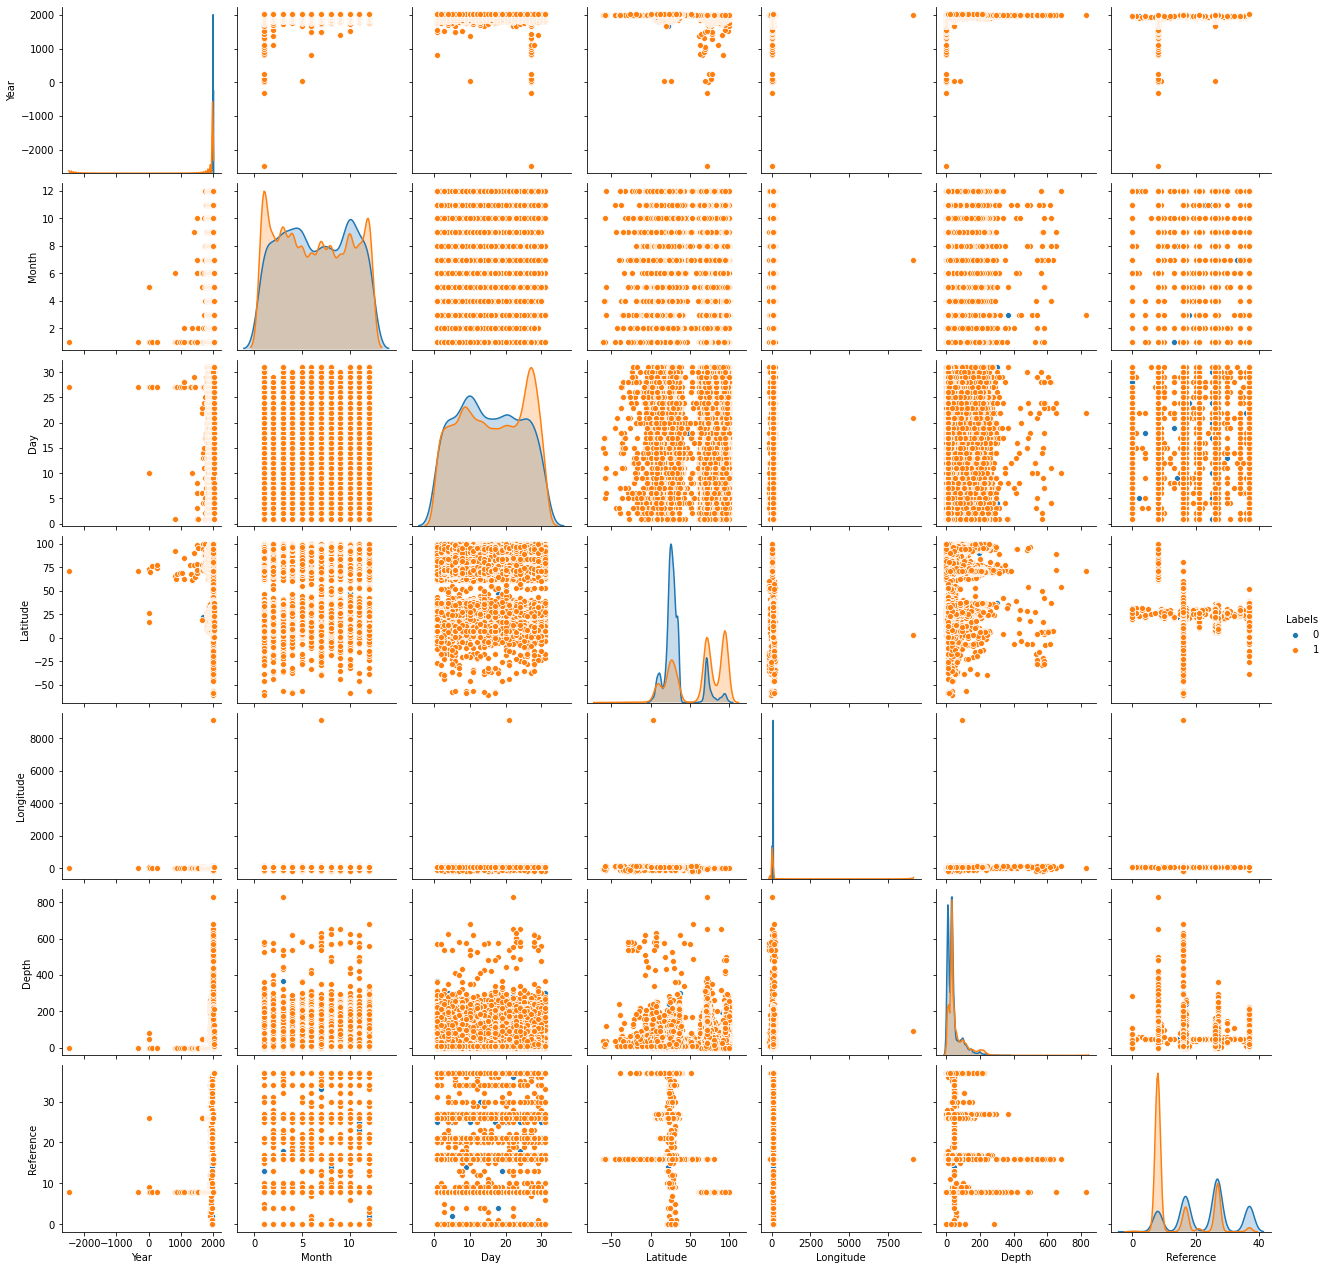

**Experiments & Analysis**



1. **4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5** values have been considered as threshold values where Mw < T , label becomes 0 (no earth-
quake) and for Mw ≥ T becomes 1 (earthquake).

2. For every threshold value KNeighbours classififer has been experimented with three types neighbours such as **1, 3, 5** and Decision tree classfiier has been exerimented with three pre-prune depths such as **5, 10, 15**.

3. For every experiment Classification report, Confusion Matrix and ROC curve has been reported.

4. In terms X and y, here the features ie. X are Year, Month, Day, Latitude, Longitude, Depth and Reference. The target value i.e. y is Mw converted into categorical of 0 and 1 based on threshold. 

**Threshold = 4**

**Kneighbours Classfier with number of Neighbours 1**

Accuracy - 0.8832326433594136

Classification report

              precision    recall  f1-score   support

           0       0.33      0.32      0.32       889
           1       0.93      0.94      0.94      9208

    accuracy                           0.88     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.88      0.88      0.88     10097



Confusion Matrix

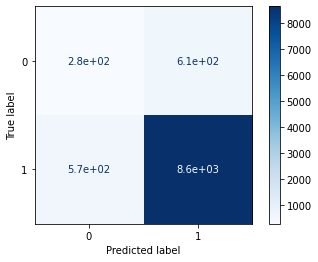

Receiver Operating Characteristic Curve

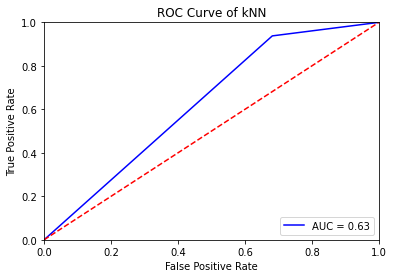

**Kneighbours Classfier with number of Neighbours 3**

Accuracy - 0.9067049618698624

Classification report

              precision    recall  f1-score   support

           0       0.45      0.30      0.36       889
           1       0.93      0.97      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.69      0.63      0.65     10097
weighted avg       0.89      0.91      0.90     10097



Confusion Matrix

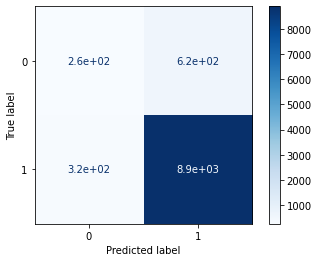

Receiver Operating Characteristic Curve

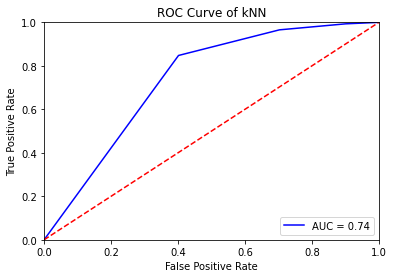

**Kneighbours Classfier with number of Neighbours 5**

Accuracy - 0.9134396355353075

CLassification Report

              precision    recall  f1-score   support

           0       0.52      0.28      0.36       889
           1       0.93      0.97      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.72      0.63      0.66     10097
weighted avg       0.90      0.91      0.90     10097



Confusion Matrix

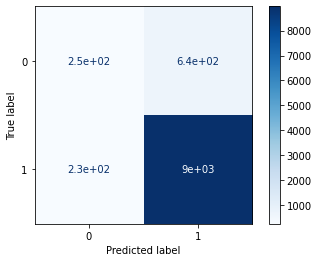

Receiver Operating Characteristic Curve

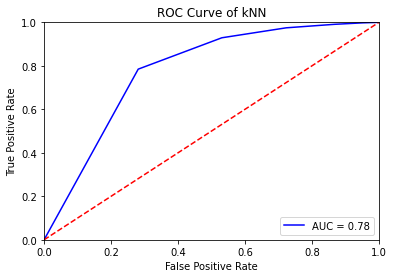

the graph for K = [1,3,5] with validation accuracies

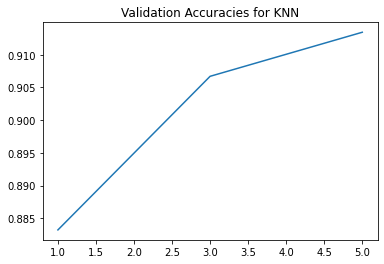

Best K Value :  5
Best Validation Accuracy :  0.9134396355353075


**Decision tree with depth = 5**

Accuracy  - 0.9157175398633257

Classification report

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       889
           1       0.93      0.99      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.58      0.61     10097
weighted avg       0.89      0.92      0.90     10097



Confusion Matrix

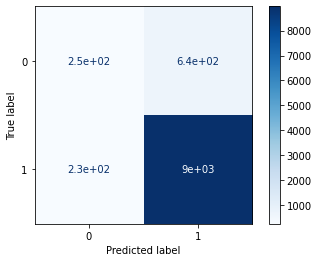

Receiver operating characteristic curve

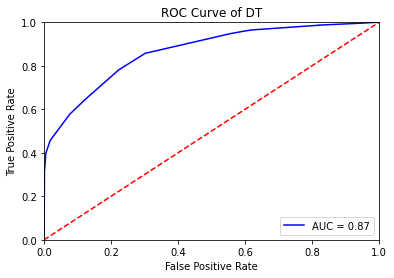

**Decision Tree Classifier with depth = 10**

Accuracy - 0.9174012082796871

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.26      0.36       889
           1       0.93      0.98      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.62      0.66     10097
weighted avg       0.90      0.92      0.90     10097



Confusion Matrix

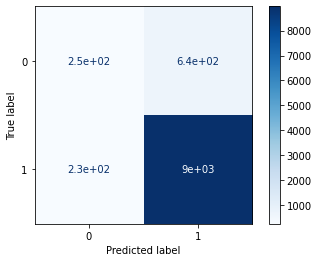

Receiver operating characteristic curve

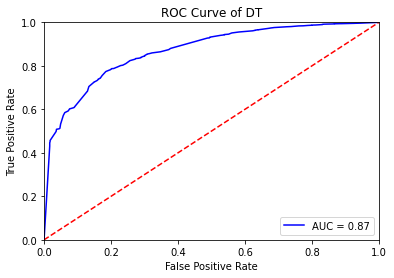

**Decision Tree with depth = 15**

Accuracy - 0.9074972764187382

Classification report

              precision    recall  f1-score   support

           0       0.46      0.31      0.37       889
           1       0.94      0.96      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.70      0.64      0.66     10097
weighted avg       0.89      0.91      0.90     10097



Confusion Matrix

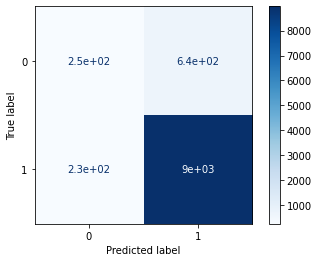

Receiver operating characteristic curve

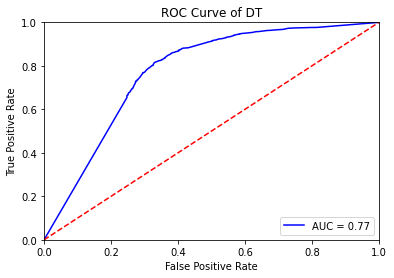

The graph for DEpth = [5,10,15] with respect to validation accuracies.

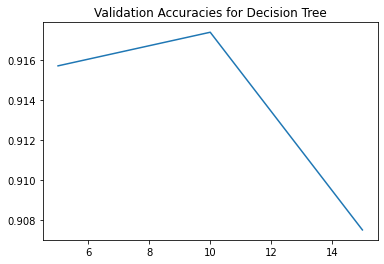

Best Depth :  10
Best Validation Accuracy :  0.9174012082796871


**Threshold** = **4.1**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.8615430325839358

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.58      0.25      0.35      1503
           1       0.88      0.97      0.92      8594

    accuracy                           0.86     10097
   macro avg       0.73      0.61      0.64     10097
weighted avg       0.84      0.86      0.84     10097



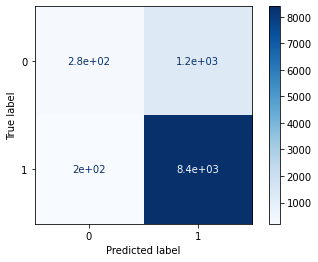

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

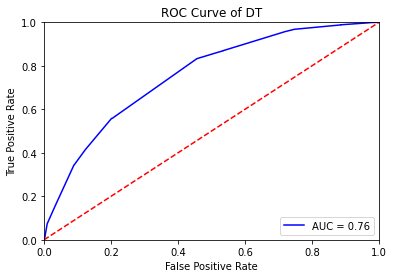

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.8633257403189066

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.61      0.23      0.34      1503
           1       0.88      0.97      0.92      8594

    accuracy                           0.86     10097
   macro avg       0.74      0.60      0.63     10097
weighted avg       0.84      0.86      0.84     10097



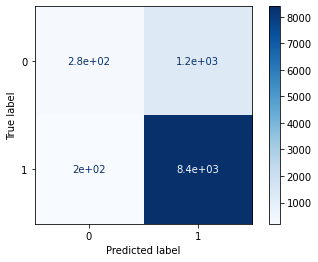

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

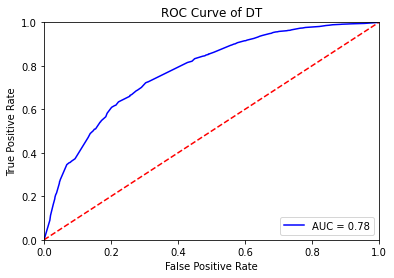

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.8433197979597901

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.46      0.27      0.34      1503
           1       0.88      0.94      0.91      8594

    accuracy                           0.84     10097
   macro avg       0.67      0.61      0.62     10097
weighted avg       0.82      0.84      0.83     10097



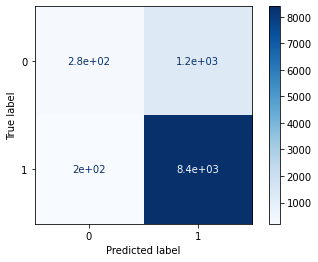

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

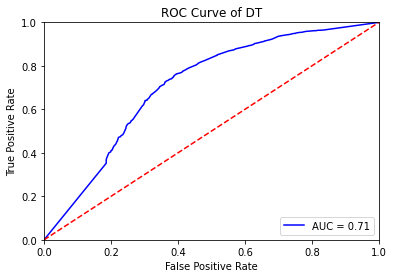

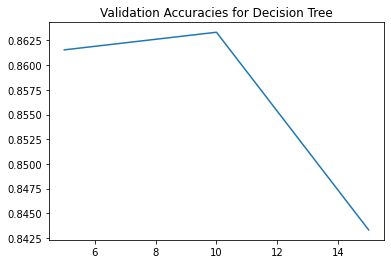

Best Depth :  10
Best Validation Accuracy :  0.8633257403189066


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.8027136773299

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      1503
           1       0.88      0.89      0.88      8594

    accuracy                           0.80     10097
   macro avg       0.61      0.61      0.61     10097
weighted avg       0.80      0.80      0.80     10097



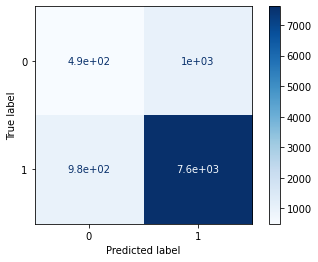

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

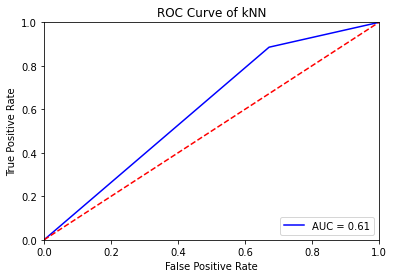

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.839259185896801

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.44      0.28      0.34      1503
           1       0.88      0.94      0.91      8594

    accuracy                           0.84     10097
   macro avg       0.66      0.61      0.63     10097
weighted avg       0.82      0.84      0.82     10097



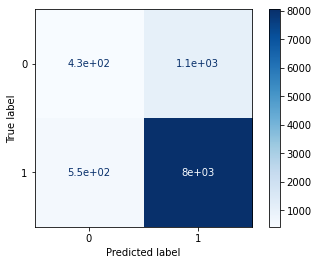

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

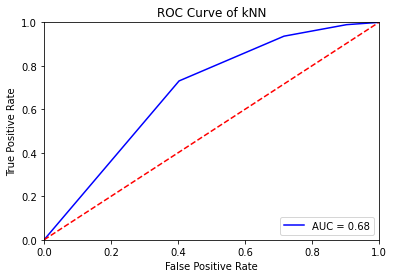

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.8515400614043775

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.50      0.26      0.35      1503
           1       0.88      0.95      0.92      8594

    accuracy                           0.85     10097
   macro avg       0.69      0.61      0.63     10097
weighted avg       0.82      0.85      0.83     10097



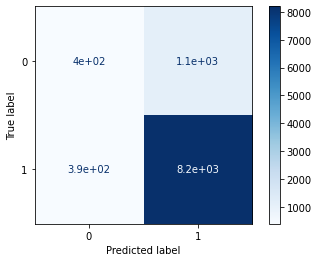

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

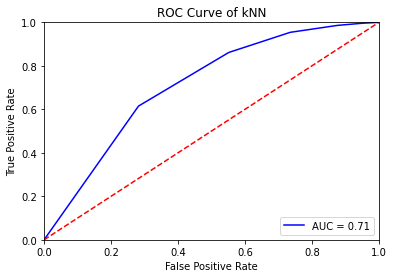

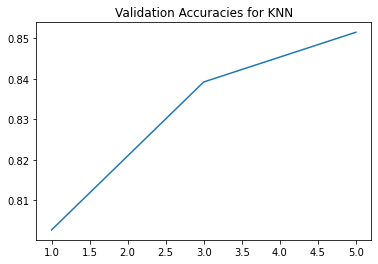

Best K Value :  5
Best Validation Accuracy :  0.8515400614043775


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.2**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.790531841140933

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.62      0.08      0.15      2186
           1       0.80      0.99      0.88      7911

    accuracy                           0.79     10097
   macro avg       0.71      0.53      0.51     10097
weighted avg       0.76      0.79      0.72     10097



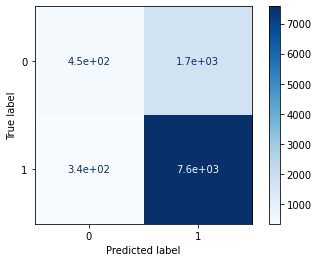

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

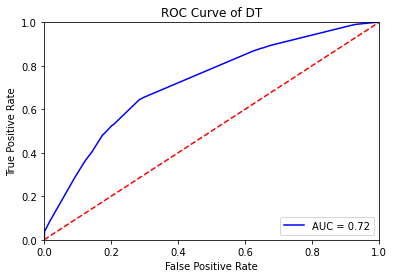

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7994453798157869

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.60      0.22      0.32      2186
           1       0.82      0.96      0.88      7911

    accuracy                           0.80     10097
   macro avg       0.71      0.59      0.60     10097
weighted avg       0.77      0.80      0.76     10097



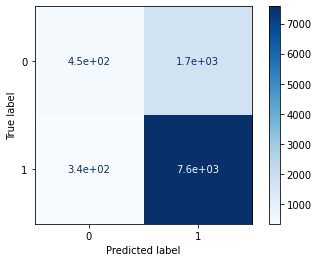

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

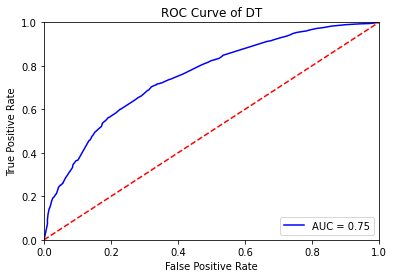

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.7819154204219075

In [ ]:
Classification report

              precision    recall  f1-score   support

           0       0.49      0.29      0.37      2186
           1       0.82      0.92      0.87      7911

    accuracy                           0.78     10097
   macro avg       0.66      0.60      0.62     10097
weighted avg       0.75      0.78      0.76     10097



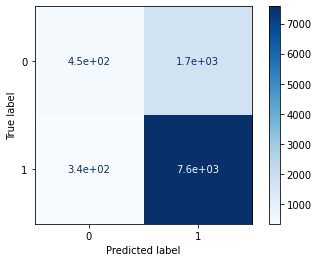

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

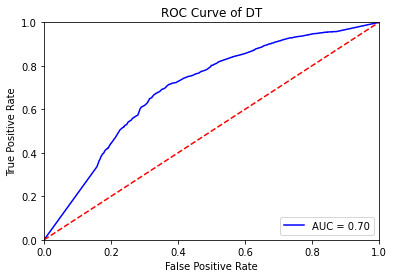

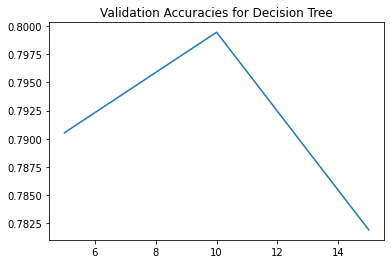

Best Depth :  10
Best Validation Accuracy :  0.7994453798157869


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.7283351490541745

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.37      0.37      0.37      2186
           1       0.83      0.83      0.83      7911

    accuracy                           0.73     10097
   macro avg       0.60      0.60      0.60     10097
weighted avg       0.73      0.73      0.73     10097



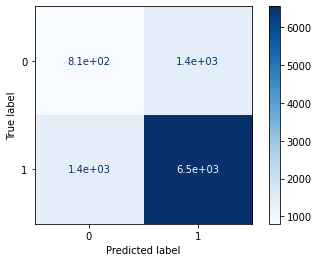

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

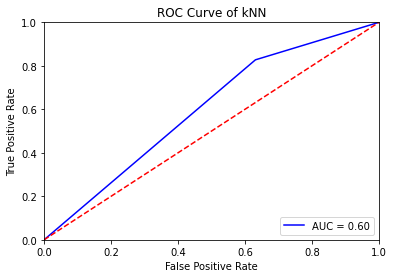

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.7674556799049222

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.45      0.34      0.39      2186
           1       0.83      0.89      0.86      7911

    accuracy                           0.77     10097
   macro avg       0.64      0.61      0.62     10097
weighted avg       0.75      0.77      0.75     10097



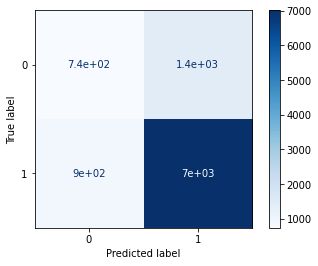

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

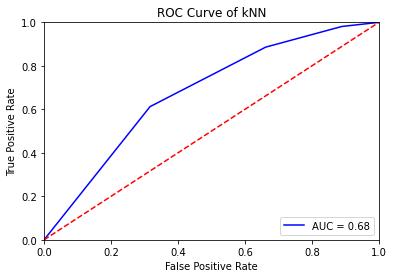

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.7792413588194513

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.48      0.31      0.38      2186
           1       0.83      0.91      0.87      7911

    accuracy                           0.78     10097
   macro avg       0.66      0.61      0.62     10097
weighted avg       0.75      0.78      0.76     10097



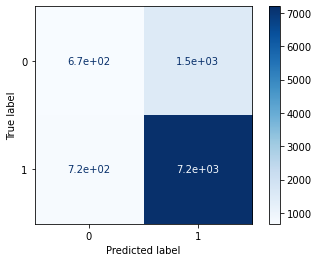

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

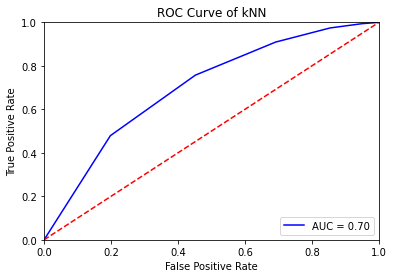

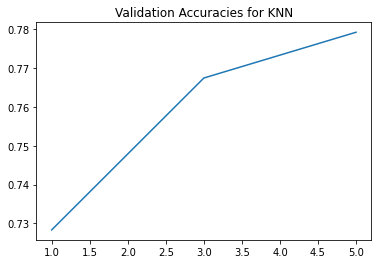

Best K Value :  5
Best Validation Accuracy :  0.7792413588194513


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.3**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.7182331385560068

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.55      0.21      0.30      2952
           1       0.74      0.93      0.82      7145

    accuracy                           0.72     10097
   macro avg       0.64      0.57      0.56     10097
weighted avg       0.68      0.72      0.67     10097



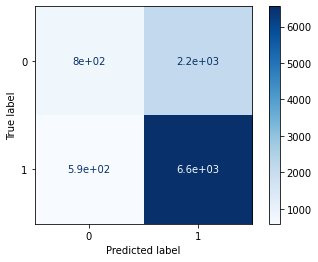

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

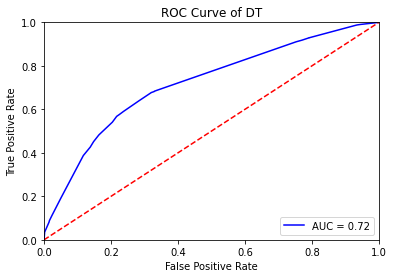

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7287313063286125

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.58      0.27      0.37      2952
           1       0.75      0.92      0.83      7145

    accuracy                           0.73     10097
   macro avg       0.66      0.59      0.60     10097
weighted avg       0.70      0.73      0.69     10097



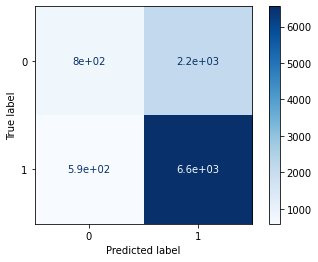

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

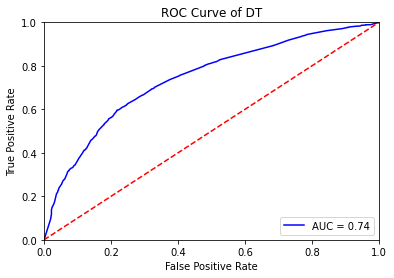

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.7140734871744082

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2952
           1       0.78      0.83      0.80      7145

    accuracy                           0.71     10097
   macro avg       0.65      0.63      0.63     10097
weighted avg       0.70      0.71      0.71     10097



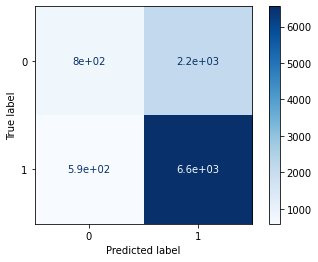

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

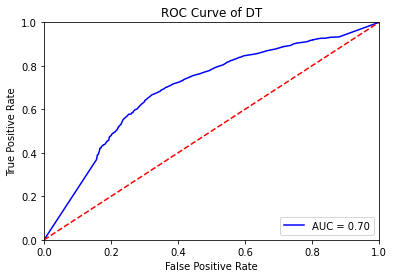

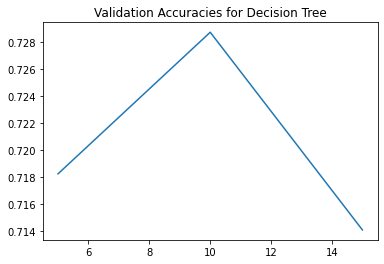

Best Depth :  10
Best Validation Accuracy :  0.7287313063286125


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.6784193324749925

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.45      0.44      0.44      2952
           1       0.77      0.78      0.77      7145

    accuracy                           0.68     10097
   macro avg       0.61      0.61      0.61     10097
weighted avg       0.68      0.68      0.68     10097



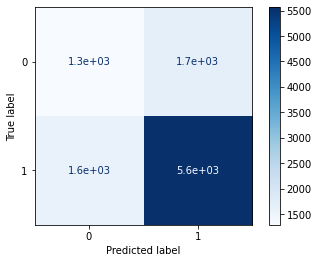

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

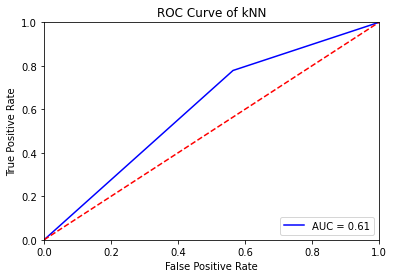

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.7067445775973061

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.50      0.42      0.46      2952
           1       0.77      0.83      0.80      7145

    accuracy                           0.71     10097
   macro avg       0.64      0.62      0.63     10097
weighted avg       0.69      0.71      0.70     10097



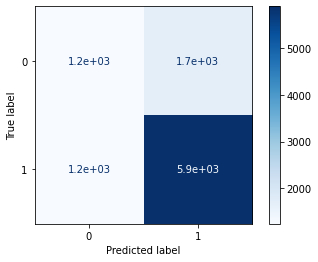

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

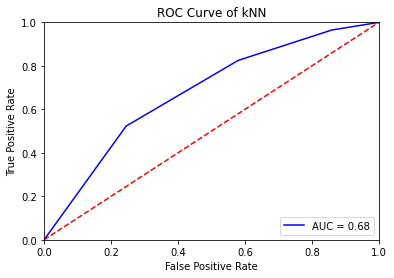

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.716450430821036

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      2952
           1       0.77      0.85      0.81      7145

    accuracy                           0.72     10097
   macro avg       0.65      0.62      0.63     10097
weighted avg       0.70      0.72      0.71     10097



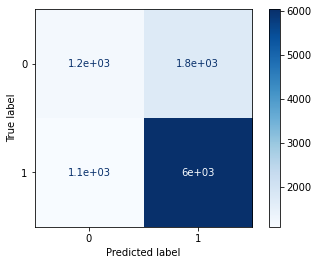

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

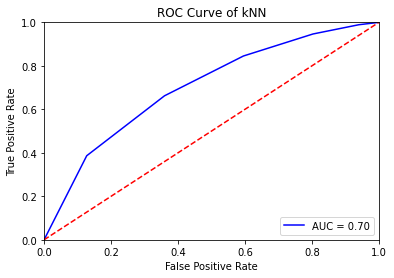

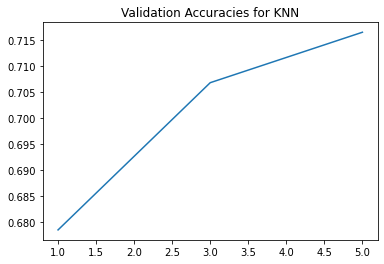

Best K Value :  5
Best Validation Accuracy :  0.716450430821036


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.4**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.6838664949985144

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.59      0.71      0.65      4120
           1       0.77      0.66      0.71      5977

    accuracy                           0.68     10097
   macro avg       0.68      0.69      0.68     10097
weighted avg       0.70      0.68      0.69     10097



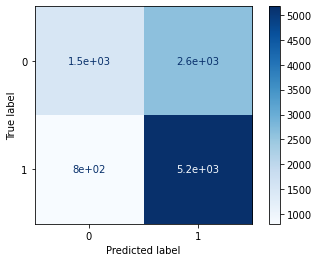

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

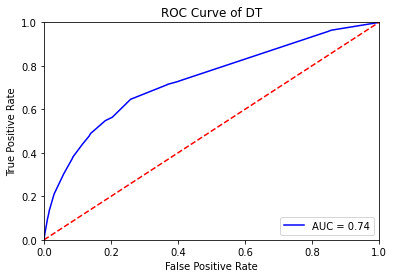

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7033772407645835

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.65      0.60      0.62      4120
           1       0.74      0.78      0.76      5977

    accuracy                           0.70     10097
   macro avg       0.69      0.69      0.69     10097
weighted avg       0.70      0.70      0.70     10097



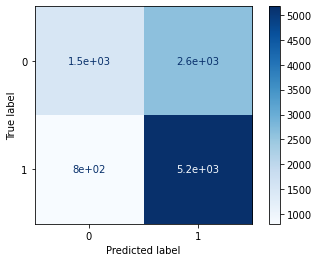

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

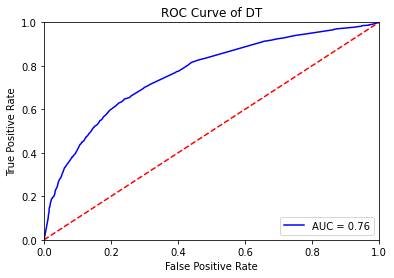

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.6883232643359414

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4120
           1       0.74      0.73      0.74      5977

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.69      0.69     10097



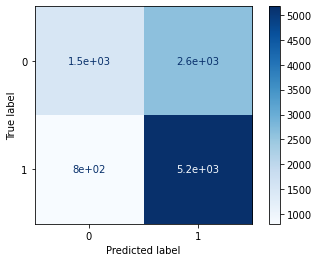

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

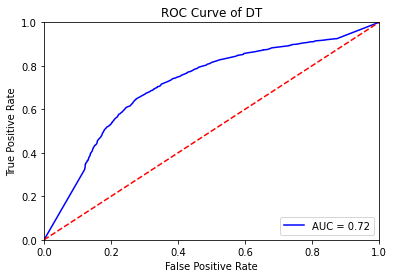

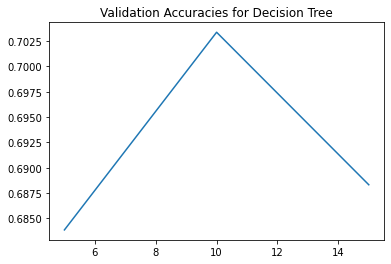

Best Depth :  10
Best Validation Accuracy :  0.7033772407645835


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.6474200257502228

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      4120
           1       0.70      0.71      0.70      5977

    accuracy                           0.65     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.65      0.65      0.65     10097



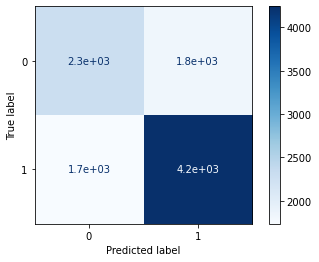

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

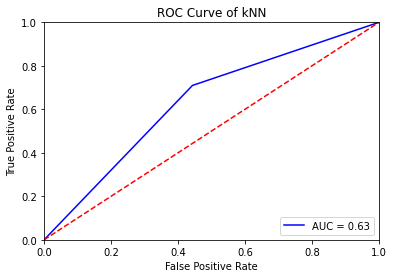

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.674655838367832

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      4120
           1       0.72      0.74      0.73      5977

    accuracy                           0.67     10097
   macro avg       0.66      0.66      0.66     10097
weighted avg       0.67      0.67      0.67     10097



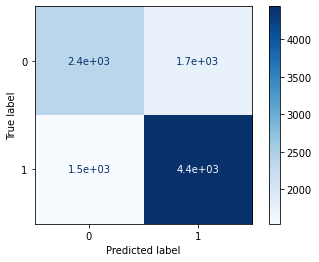

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

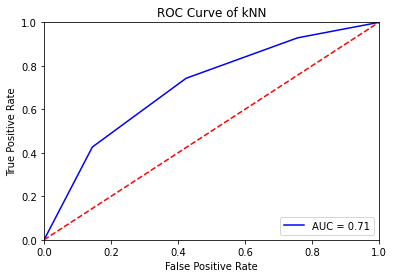

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.6863424779637516

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      4120
           1       0.73      0.75      0.74      5977

    accuracy                           0.69     10097
   macro avg       0.67      0.67      0.67     10097
weighted avg       0.68      0.69      0.68     10097



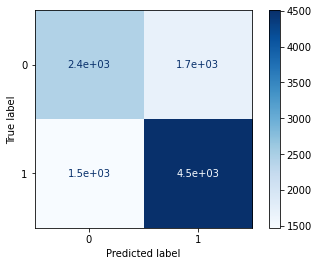

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

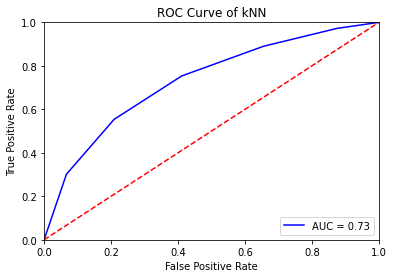

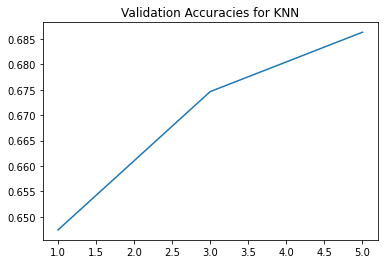

Best K Value :  5
Best Validation Accuracy :  0.6863424779637516


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.5**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.6825789838565911

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      4894
           1       0.75      0.58      0.65      5203

    accuracy                           0.68     10097
   macro avg       0.69      0.69      0.68     10097
weighted avg       0.70      0.68      0.68     10097



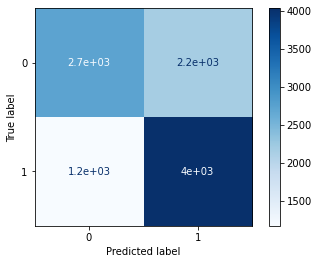

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

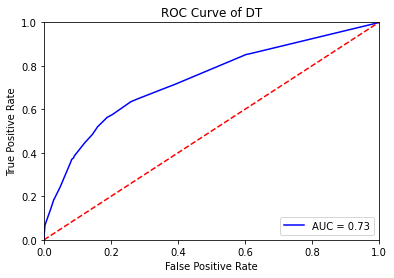

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7059522630484302

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      4894
           1       0.74      0.67      0.70      5203

    accuracy                           0.71     10097
   macro avg       0.71      0.71      0.71     10097
weighted avg       0.71      0.71      0.71     10097



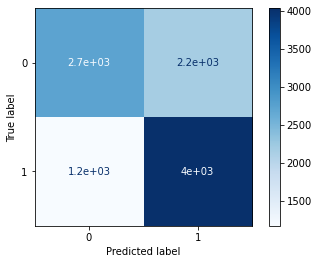

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

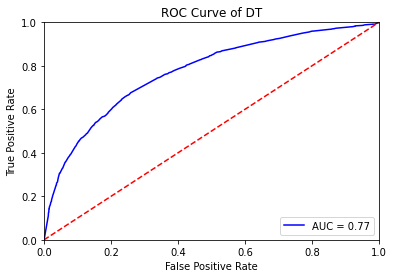

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.6845597702287808

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4894
           1       0.70      0.67      0.69      5203

    accuracy                           0.68     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.68      0.68     10097



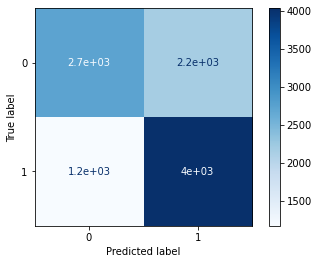

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

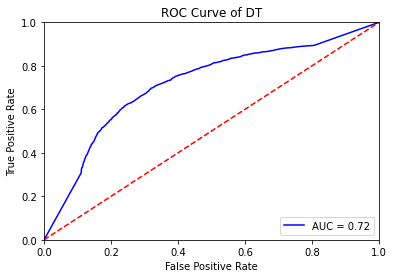

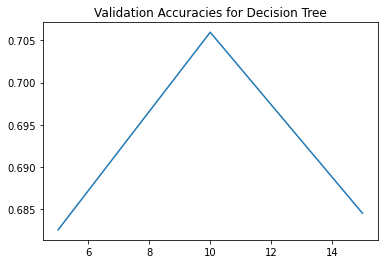

Best Depth :  10
Best Validation Accuracy :  0.7059522630484302


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.6354362681984748

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4894
           1       0.65      0.65      0.65      5203

    accuracy                           0.64     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.64      0.64      0.64     10097



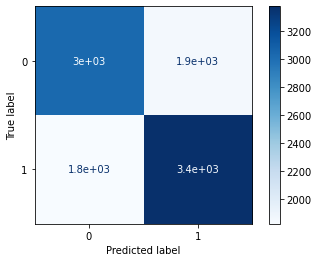

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

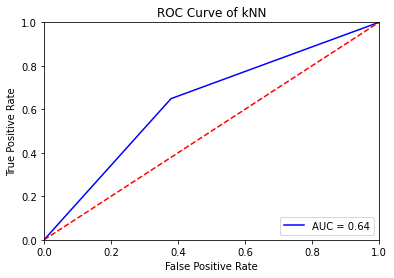

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.6658413390115876

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4894
           1       0.67      0.68      0.68      5203

    accuracy                           0.67     10097
   macro avg       0.67      0.67      0.67     10097
weighted avg       0.67      0.67      0.67     10097



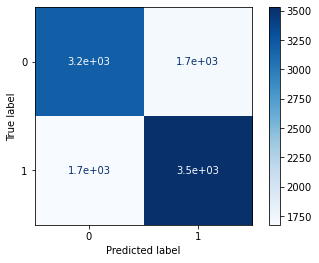

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

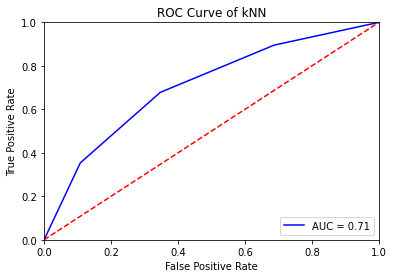

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.6781222145191641

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4894
           1       0.69      0.68      0.69      5203

    accuracy                           0.68     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.68      0.68      0.68     10097



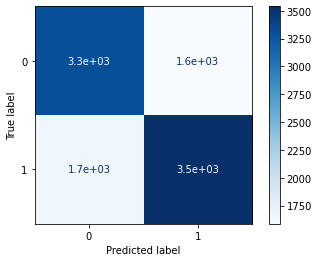

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

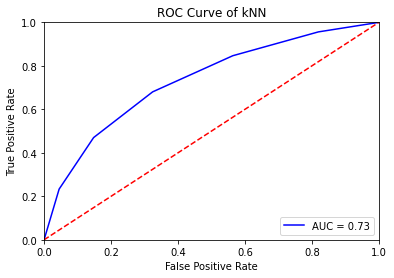

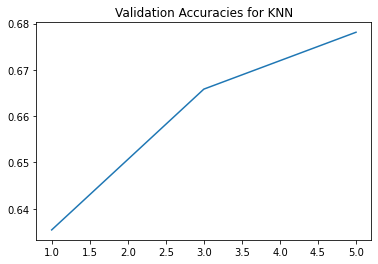

Best K Value :  5
Best Validation Accuracy :  0.6781222145191641


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.6**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.6973358423294048

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      5626
           1       0.73      0.51      0.60      4471

    accuracy                           0.70     10097
   macro avg       0.71      0.68      0.68     10097
weighted avg       0.70      0.70      0.69     10097



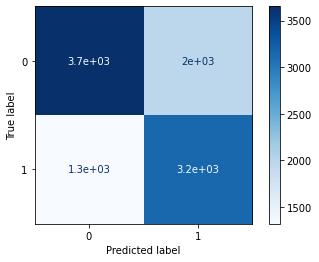

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

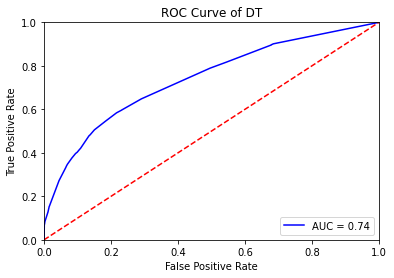

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7150638803605032

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      5626
           1       0.72      0.58      0.64      4471

    accuracy                           0.72     10097
   macro avg       0.72      0.70      0.70     10097
weighted avg       0.72      0.72      0.71     10097



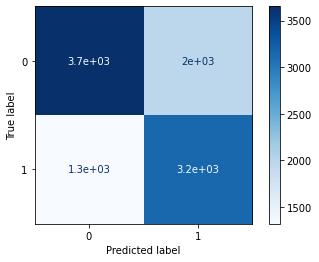

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

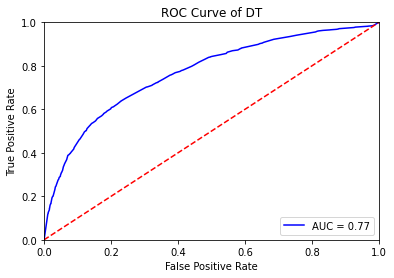

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.6883232643359414

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      5626
           1       0.67      0.59      0.63      4471

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.69      0.69     10097



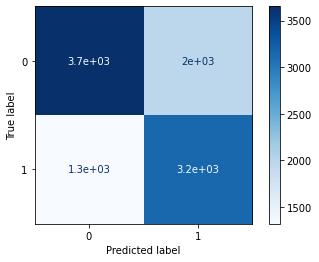

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

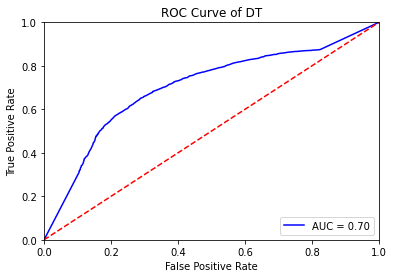

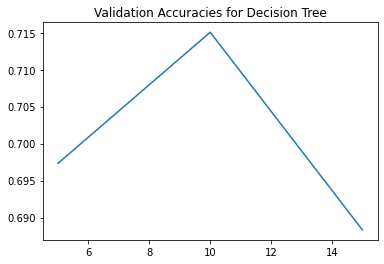

Best Depth :  10
Best Validation Accuracy :  0.7150638803605032


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.6389026443498069

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      5626
           1       0.59      0.59      0.59      4471

    accuracy                           0.64     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.64      0.64      0.64     10097



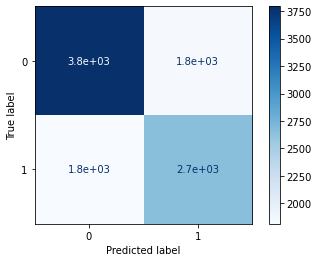

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

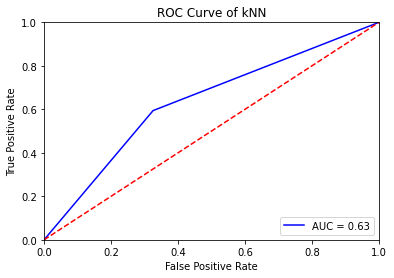

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.6687134792512628

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5626
           1       0.63      0.61      0.62      4471

    accuracy                           0.67     10097
   macro avg       0.66      0.66      0.66     10097
weighted avg       0.67      0.67      0.67     10097



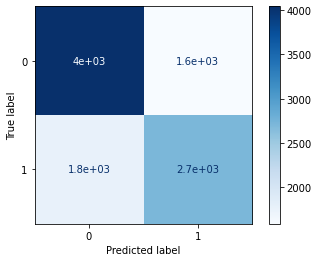

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

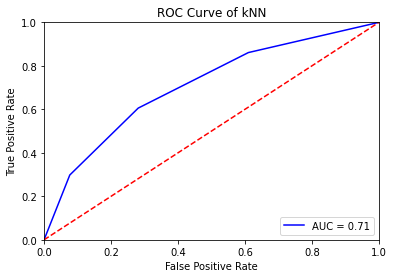

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.6862434386451421

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5626
           1       0.66      0.61      0.63      4471

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.68      0.69      0.68     10097



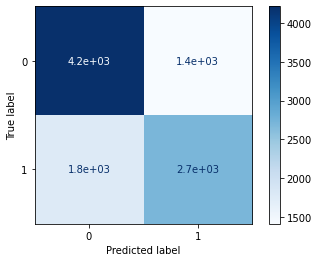

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

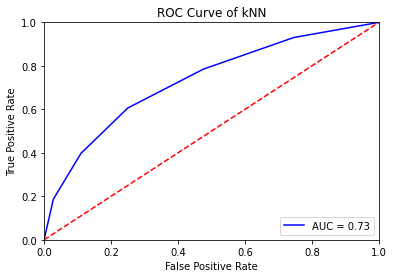

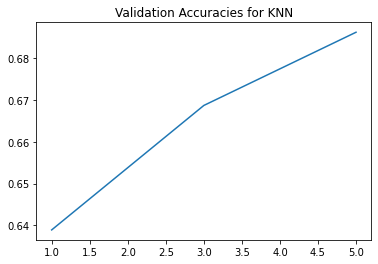

Best K Value :  5
Best Validation Accuracy :  0.6862434386451421


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.7**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.7165494701396454

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.72      0.89      0.80      6321
           1       0.70      0.42      0.53      3776

    accuracy                           0.72     10097
   macro avg       0.71      0.66      0.66     10097
weighted avg       0.71      0.72      0.70     10097



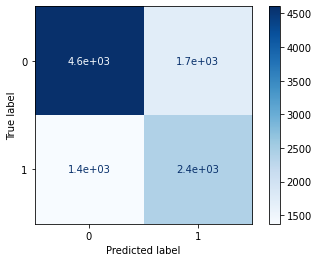

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

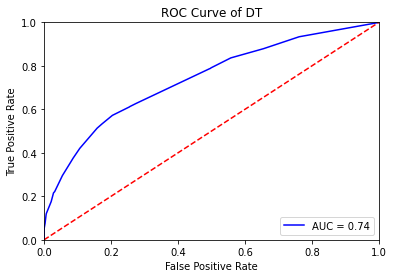

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7320986431613351

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6321
           1       0.69      0.51      0.59      3776

    accuracy                           0.73     10097
   macro avg       0.72      0.69      0.69     10097
weighted avg       0.73      0.73      0.72     10097



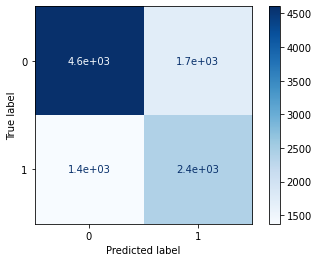

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

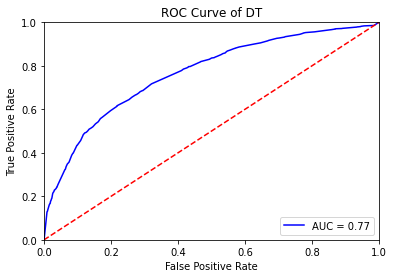

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.7167475487768644

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6321
           1       0.64      0.54      0.59      3776

    accuracy                           0.72     10097
   macro avg       0.70      0.68      0.69     10097
weighted avg       0.71      0.72      0.71     10097



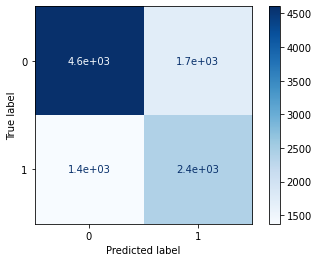

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

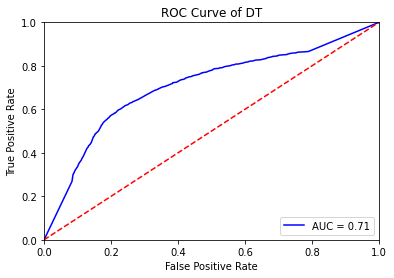

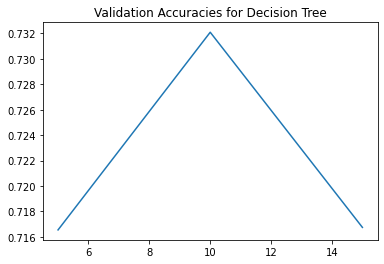

Best Depth :  10
Best Validation Accuracy :  0.7320986431613351


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.6619788055858176

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6321
           1       0.55      0.55      0.55      3776

    accuracy                           0.66     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.66      0.66      0.66     10097



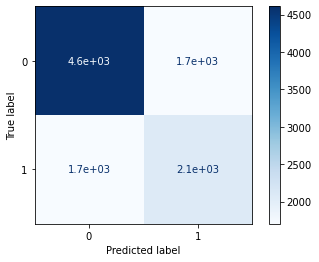

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

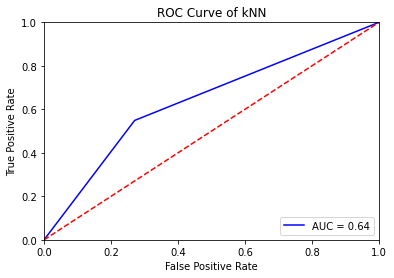

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.6940675448152916

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      6321
           1       0.60      0.54      0.57      3776

    accuracy                           0.69     10097
   macro avg       0.67      0.66      0.67     10097
weighted avg       0.69      0.69      0.69     10097



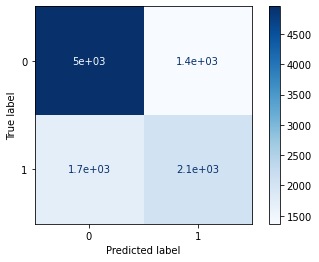

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

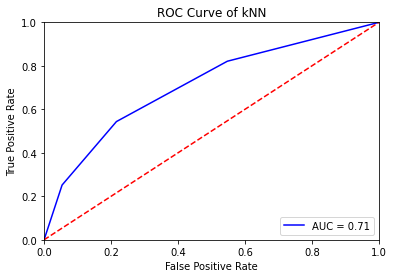

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.7052589878181638

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      6321
           1       0.62      0.53      0.57      3776

    accuracy                           0.71     10097
   macro avg       0.68      0.67      0.67     10097
weighted avg       0.70      0.71      0.70     10097



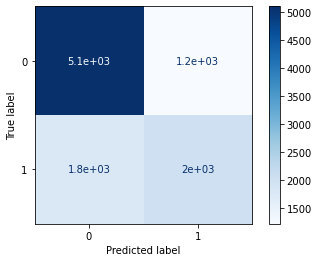

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

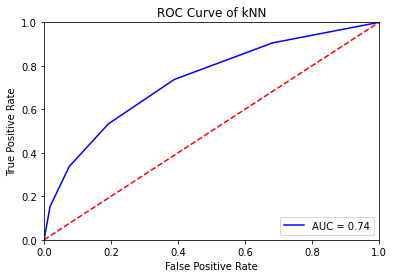

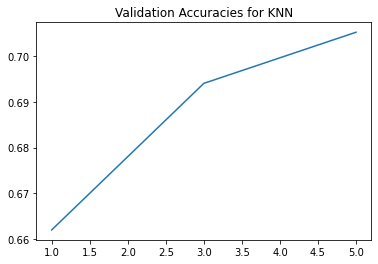

Best K Value :  5
Best Validation Accuracy :  0.7052589878181638


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.8**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.7458651084480539

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      6993
           1       0.65      0.37      0.47      3104

    accuracy                           0.75     10097
   macro avg       0.71      0.64      0.65     10097
weighted avg       0.73      0.75      0.72     10097



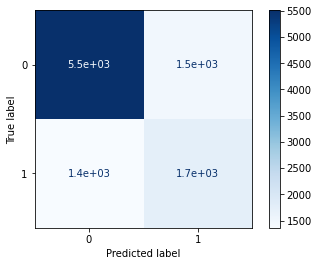

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

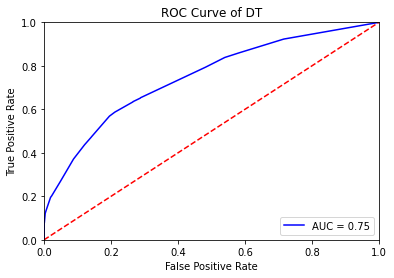

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7599286916906012

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6993
           1       0.66      0.45      0.53      3104

    accuracy                           0.76     10097
   macro avg       0.72      0.67      0.69     10097
weighted avg       0.75      0.76      0.74     10097



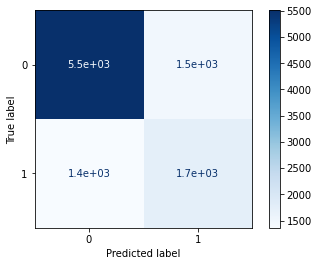

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

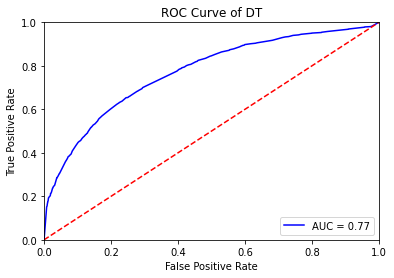

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.740021788650094

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      6993
           1       0.59      0.49      0.54      3104

    accuracy                           0.74     10097
   macro avg       0.69      0.67      0.68     10097
weighted avg       0.73      0.74      0.73     10097



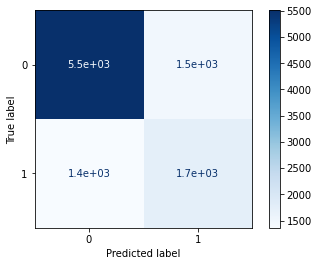

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

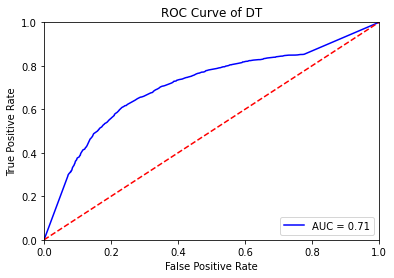

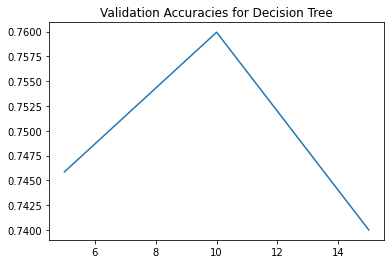

Best Depth :  10
Best Validation Accuracy :  0.7599286916906012


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.687233831831237

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6993
           1       0.49      0.49      0.49      3104

    accuracy                           0.69     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.69      0.69      0.69     10097



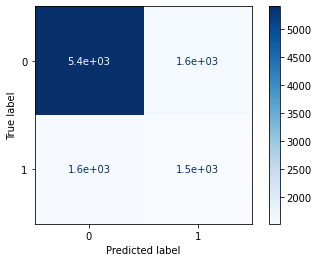

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

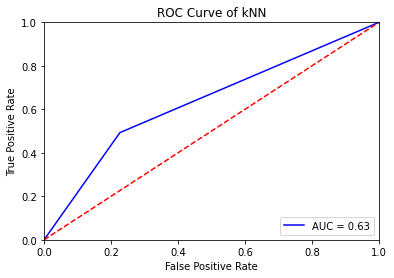

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.7200158462909775

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      6993
           1       0.55      0.46      0.50      3104

    accuracy                           0.72     10097
   macro avg       0.67      0.65      0.65     10097
weighted avg       0.71      0.72      0.71     10097



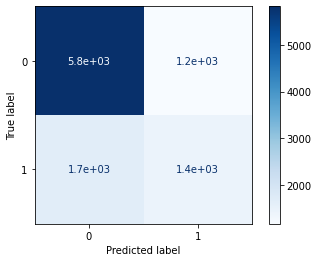

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

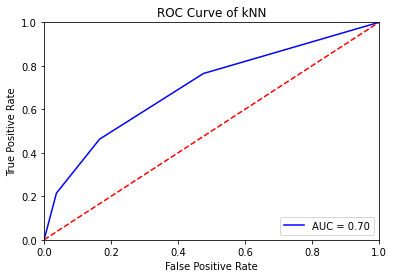

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.7348717440824007

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      6993
           1       0.59      0.45      0.51      3104

    accuracy                           0.73     10097
   macro avg       0.68      0.66      0.66     10097
weighted avg       0.72      0.73      0.72     10097



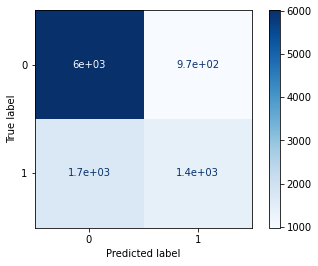

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

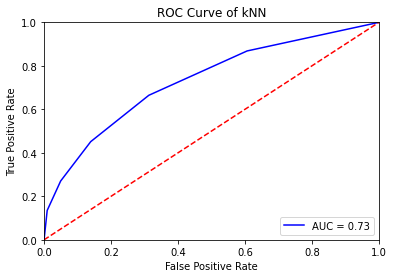

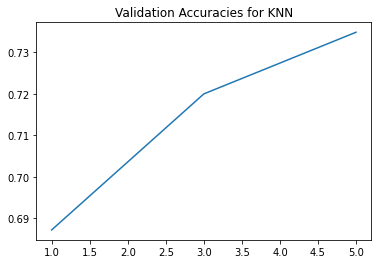

Best K Value :  5
Best Validation Accuracy :  0.7348717440824007


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 4.9**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.7916212736456373

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.97      0.88      7584
           1       0.75      0.24      0.37      2513

    accuracy                           0.79     10097
   macro avg       0.77      0.61      0.62     10097
weighted avg       0.78      0.79      0.75     10097



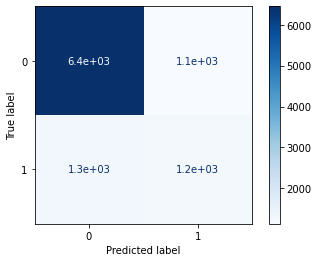

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

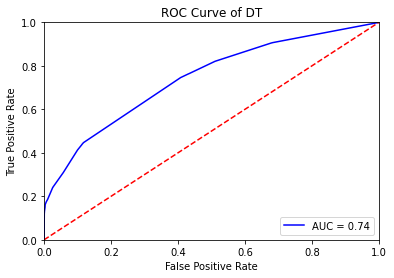

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.7916212736456373

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7584
           1       0.68      0.31      0.43      2513

    accuracy                           0.79     10097
   macro avg       0.74      0.63      0.65     10097
weighted avg       0.77      0.79      0.76     10097



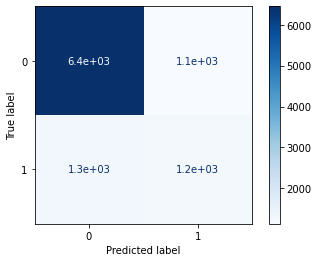

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

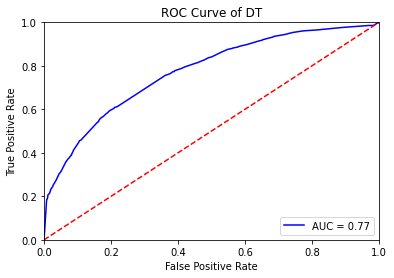

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.78528275725463

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      7584
           1       0.60      0.40      0.48      2513

    accuracy                           0.79     10097
   macro avg       0.71      0.66      0.67     10097
weighted avg       0.77      0.79      0.77     10097



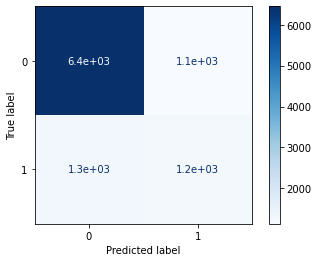

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

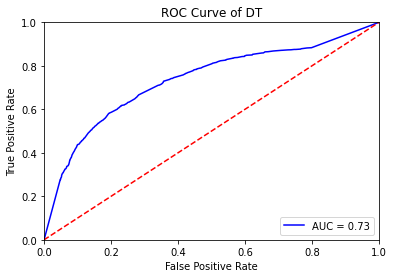

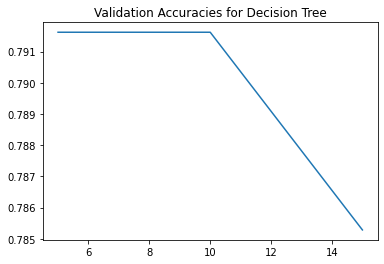

Best Depth :  5
Best Validation Accuracy :  0.7916212736456373


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.732296721798554

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7584
           1       0.46      0.46      0.46      2513

    accuracy                           0.73     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.73      0.73      0.73     10097



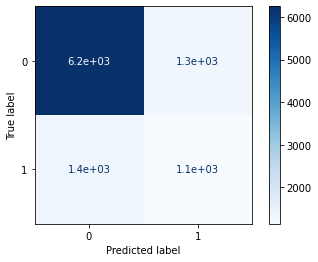

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

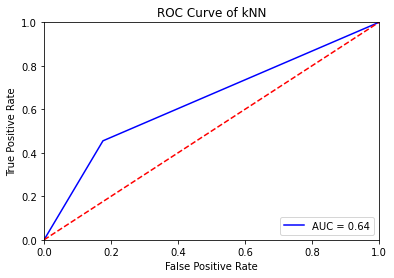

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.7677527978607507

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7584
           1       0.54      0.42      0.47      2513

    accuracy                           0.77     10097
   macro avg       0.68      0.65      0.66     10097
weighted avg       0.75      0.77      0.76     10097



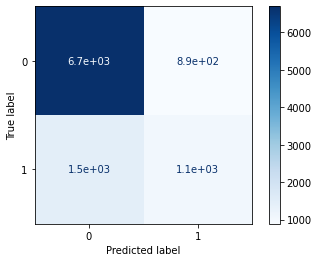

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

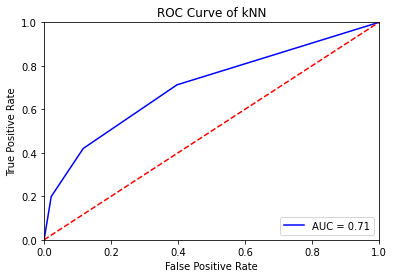

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.7762701792611667

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7584
           1       0.57      0.39      0.46      2513

    accuracy                           0.78     10097
   macro avg       0.70      0.65      0.66     10097
weighted avg       0.76      0.78      0.76     10097



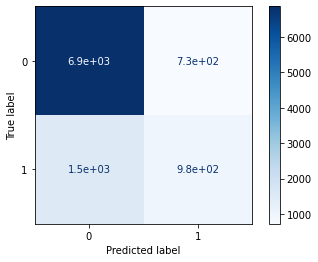

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

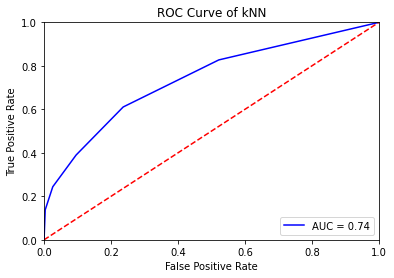

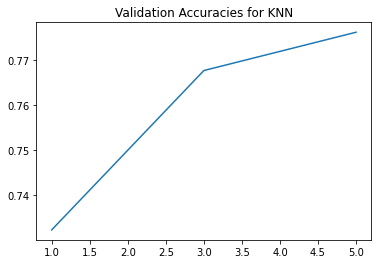

Best K Value :  5
Best Validation Accuracy :  0.7762701792611667


In [ ]:
the graph for K = [1,3,5] with validation accuracies

**Threshold 5**

**Decision tree with Depth = 5**

In [ ]:
Accuracy

0.8420322868178667

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8143
           1       0.87      0.22      0.35      1954

    accuracy                           0.84     10097
   macro avg       0.86      0.60      0.63     10097
weighted avg       0.85      0.84      0.80     10097



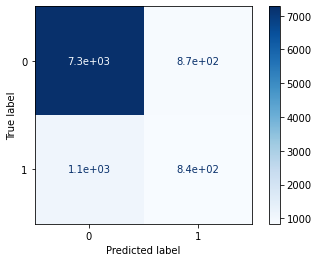

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

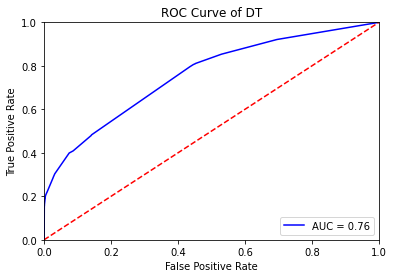

**Decision tree with Depth = 10**

In [ ]:
Accuracy

0.8427255620481331

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8143
           1       0.76      0.27      0.40      1954

    accuracy                           0.84     10097
   macro avg       0.80      0.63      0.66     10097
weighted avg       0.83      0.84      0.81     10097



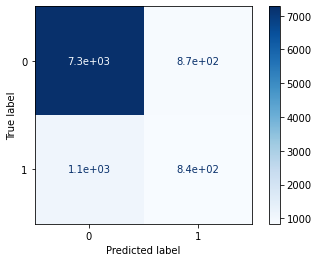

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

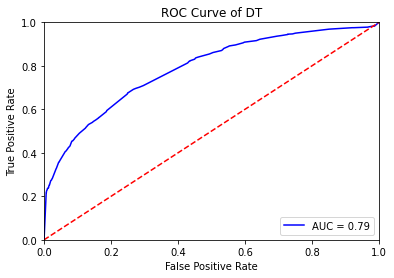

**Decision tree with Depth = 15**

In [ ]:
Accuracy

0.8287610181241953

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8143
           1       0.60      0.35      0.44      1954

    accuracy                           0.83     10097
   macro avg       0.73      0.65      0.67     10097
weighted avg       0.81      0.83      0.81     10097



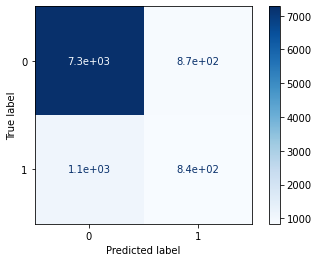

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

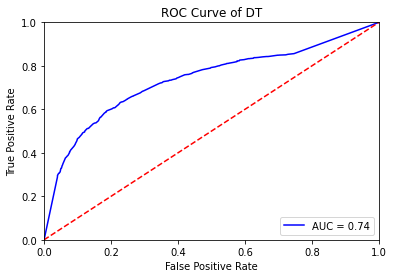

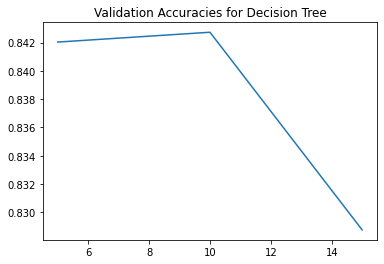

Best Depth :  10
Best Validation Accuracy :  0.8427255620481331


In [ ]:
The graph for DEpth = [5,10,15] with respect to validation accuracies.

**Kneighbours Classfier with number of Neighbours 1**

In [ ]:
Accuracy

0.7839952461127068

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      8143
           1       0.44      0.43      0.44      1954

    accuracy                           0.78     10097
   macro avg       0.65      0.65      0.65     10097
weighted avg       0.78      0.78      0.78     10097



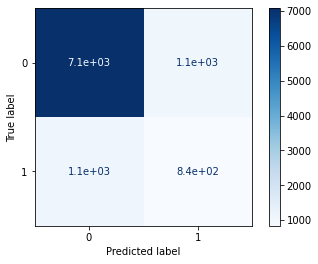

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

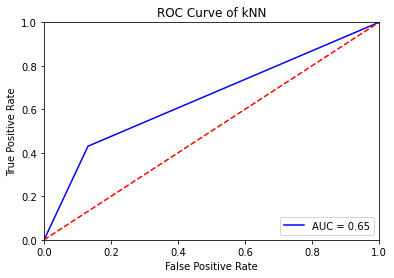

**Kneighbours Classfier with number of Neighbours 3**

In [ ]:
Accuracy

0.8185599683074181

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8143
           1       0.54      0.38      0.45      1954

    accuracy                           0.82     10097
   macro avg       0.70      0.65      0.67     10097
weighted avg       0.80      0.82      0.81     10097



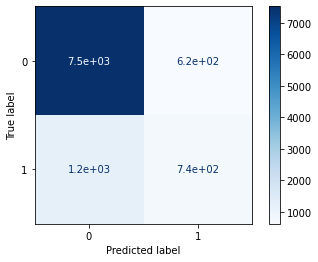

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

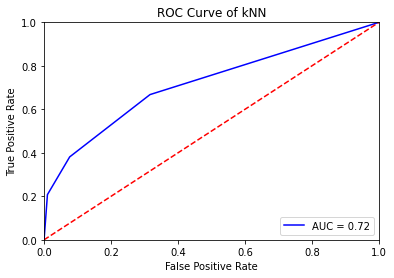

**Kneighbours Classfier with number of Neighbours 5**

In [ ]:
Accuracy

0.8291571753986332

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8143
           1       0.60      0.34      0.44      1954

    accuracy                           0.83     10097
   macro avg       0.73      0.64      0.67     10097
weighted avg       0.81      0.83      0.81     10097



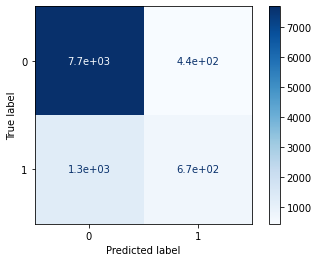

In [ ]:
Confusion Matrix

Receiver operating characteristic curve

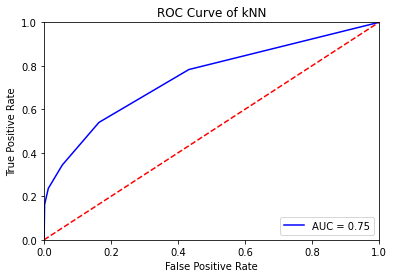

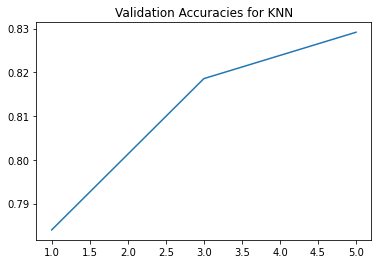

Best K Value :  5
Best Validation Accuracy :  0.8291571753986332


In [ ]:
the graph for K = [1,3,5] with validation accuracies



---



---



**Observations**

For the Threshold **4** both of the classifier performs the best.

For Decisiont Tree classifier, the classifier with preprune depth = **10** and for KNN classififer, the classifier with K = **5** give the best validation accuracy 

**Decision Tree**

Accuracy - 0.9174012082796871

In [ ]:
Classfication Report

              precision    recall  f1-score   support

           0       0.57      0.26      0.36       889
           1       0.93      0.98      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.62      0.66     10097
weighted avg       0.90      0.92      0.90     10097



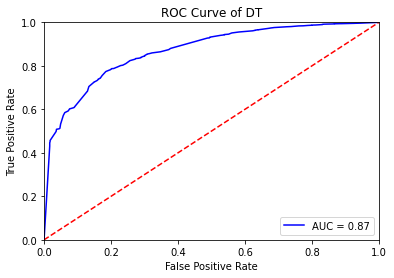

In [ ]:
ROC curve

**KNeighbours Classifier**

Accuracy - 0.9134396355353075

In [ ]:
Classification Report

              precision    recall  f1-score   support

           0       0.52      0.28      0.36       889
           1       0.93      0.97      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.72      0.63      0.66     10097
weighted avg       0.90      0.91      0.90     10097



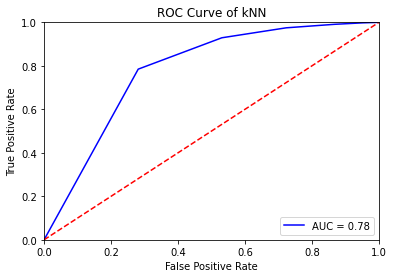

In [ ]:
ROC curve



---



---



**1. Plot ROC for both these classifiers for K as parameter in KNN and
pre-prune depth as a parameter in Decision Tree.**

So from teh above analysis we have seen that if we use 4 as Threshold then both of classifiers produce the best validation accuracy. So considering 4 as Threshold we have plot the ROC curves of Kneighbours Classifier for the number of neighbours [1,3,5] and Decision Tree classifier for the prep-prune depth of [5,10,15]. 

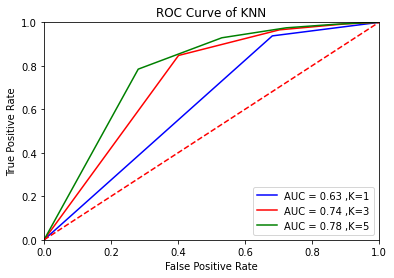

In [ ]:
Kneightbours Classifier for neighbours [1,3,5]

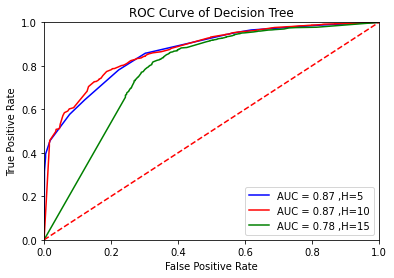

In [ ]:
Decision Tree CLassifier for pre-prune depth of [5,10,15]

**2. Which is the better classifier for this data amongst the two? Give Reasoning.**

As we have observed that for all the threshold we can say that Decision Tree is better classifier than KNN from the observation of ROC curve and validation accuracy.

Decision Tree uses Information Gain/Gini Index to prioritise it's features. And it selects the features which classify the data better than others based on information gain. So it's has advantage of choosing best performing features.

On the other hand KNN uses distance metrics to compute the distance from test data to the traning data. And it chooses nearest neighbours from the training data. KNN performs best when the data is well seperated and it also gives equal priority to all the features. So KNN relying on only distance metrics and prioritising the features gives Decison Tree the advantages of performing better than KNN.

**3. What could be the best possible values of the parameters for respective
classifier based on the ROC curves? Give Reasoning.**

As we have observed that if we consider the Threshold 4 then KNN and Decision Tree performs better than in other Thresholds. 

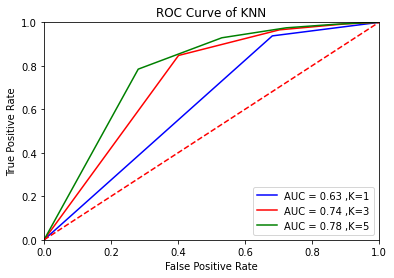

In [ ]:
Kneightbours Classifier for neighbours [1,3,5]

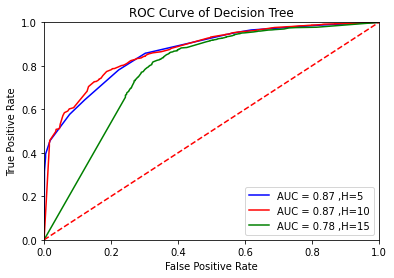

In [ ]:
Decision Tree CLassifier for pre-prune depth of [5,10,15]

As, ROC curve is good when the area covered by ROC curve is bigger. So from the above two observation- 

For KNN, when K = 5 ROC curve covers the bigger area than the other two parameters. So **K = 5** is the best performing parameter for KNN.

For Decision Tree, when pre-prune Depth = 10 it covers the bigger area than the other two paraeters, So **pre-prune Depth = 10** is the best performing paramter for Decision Tree.

**4. If you have to choose only a subset of two features to predict earthquake,
which ones would it be? Give Reasoning. [Hint: You may use nodes of
estimated Decision Tree or other techniques]**

Here are the feature importance which has been calculated using Decision Tree Classifier - 

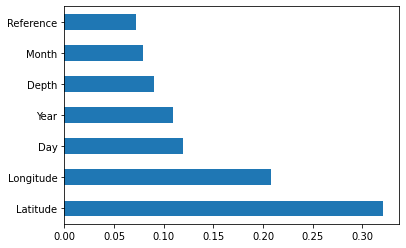

So the if we have to choose two subset of features then those two features would be - **Latitude and Longitude**

**5. Consider test results of the best model from above analysis. Report the input features that was used to achieve this. Try to improvise the test results
by applying feature processing(You may come up with additional features
by processing original ones). Report the new set of features that was used
and also report the improvements in test results that was achieved. Please
use appropriate metrics to report the results.**

From the above analysis it it's hbeen observed that when Threshold is 4 and Decision Tree with pre-prune Depth = 10 performs best among all. FOllowing are the report from the experiment - Accuracy - 0.9174012082796871. and The ROC curve - 

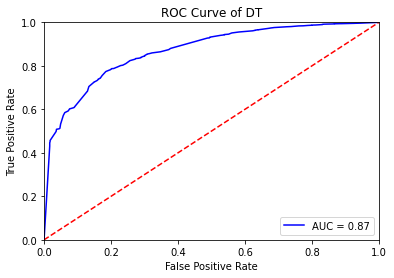

The input features which have been used for this are - **Year, Month, Day, Laittude, Longitude, Reference**

To improvise the result 
> adding new feture which **Period**.

 Nasically this feature contains period between years between consecutive earthquake. Using this KNN has produced better result than the previous best result while K = 5.
New accuracy = 0.9161136971377637 and the previous best accuracy = 0.9134396355353075 . 

For Decision Tree the result does not change. The accuracy remains almost same.

In [ ]:
Classification report using Improvised features for KNN with k = 5

              precision    recall  f1-score   support

           0       0.54      0.30      0.39       889
           1       0.94      0.98      0.95      9208

    accuracy                           0.92     10097
   macro avg       0.74      0.64      0.67     10097
weighted avg       0.90      0.92      0.91     10097



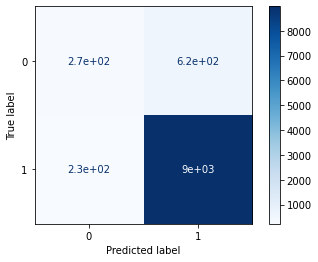

In [ ]:
COnfusion matrix using Improvised features for KNN with k = 5

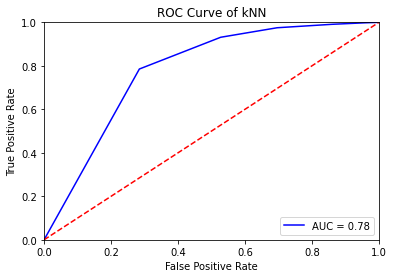

In [ ]:
ROC curve using Improvised features for KNN with k = 5